# Tutorial: Running community dynamics simulations

Some introductory spiel...

## Import packages

In [2]:
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns
from copy import deepcopy

from community_dynamics_and_properties_v2 import *

...

In [3]:
community_parameters_object = community_parameters(no_species=50, growth_func_name='fixed', growth_args=None,
                                                   interact_func_name='random', interact_args={'mu_a':0.9,'sigma_a':0.15},
                                                   usersupplied_growth=None, usersupplied_interactmat=None,
                                                   dispersal=1e-8)

... You could also initialise the community parameters object like this:

In [4]:
no_species = 50
interaction_distribution = {'mu_a':0.9,'sigma_a':0.15}
dispersal=1e-8

community_parameters_object = community_parameters(no_species, 'fixed', None, 'random', interaction_distribution,
                                                   None, None, 1e-8)

This object will store all the parameters for your gLV model. For example:

In [5]:
community_parameters_object.growth_rates

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [6]:
community_parameters_object.interaction_matrix

array([[1.        , 0.85310198, 0.63638379, ..., 0.95971242, 0.97262529,
        0.94621056],
       [0.87554653, 1.        , 0.73386554, ..., 1.23330408, 0.985521  ,
        0.76351132],
       [0.72292666, 0.88752589, 1.        , ..., 0.88728454, 1.12461757,
        0.58809717],
       ...,
       [1.06854084, 0.75309446, 0.88329985, ..., 1.        , 0.55226038,
        1.125835  ],
       [0.65082686, 1.15752944, 0.97786224, ..., 0.87344493, 1.        ,
        0.81245166],
       [1.09184973, 0.65694778, 0.93745905, ..., 1.01952702, 0.81910438,
        1.        ]])

In [7]:
community_parameters_object.dispersal

1e-08

... more spiel about the different class options ...

To run a gLV model/simulation...

In [9]:
initial_species_abundances = np.repeat(0.5,no_species)

gLV_simulation_results = gLV(community_parameters_object, t_end=10000, usersupplied_init_cond=initial_species_abundances)

In [10]:
gLV_simulation_results = gLV(community_parameters_object, t_end=10000, init_cond_func_name='Mallmin')

... plotting ...

Text(0, 0.5, 'Species abundance')

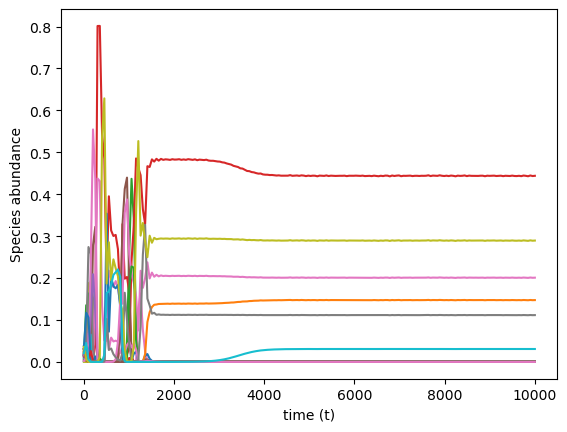

In [11]:
plt.plot(gLV_simulation_results.ODE_sol.t,gLV_simulation_results.ODE_sol.y.T)
plt.xlabel('time (t)')
plt.ylabel('Species abundance')

You can also see other simulations features, e.g. initial species abundance:

In [12]:
gLV_simulation_results.initial_abundances

array([1.43309503e-02, 2.84551244e-02, 1.47577737e-02, 1.75779660e-02,
       3.13238765e-02, 1.60135261e-02, 4.70024372e-03, 3.12382425e-02,
       3.00687387e-02, 1.97158587e-02, 1.71694668e-03, 1.98587439e-02,
       9.74107308e-03, 2.37693561e-02, 3.68568044e-03, 1.60922256e-02,
       1.20563397e-02, 4.64334735e-03, 2.76521598e-02, 3.72556639e-02,
       3.03693477e-02, 2.48561533e-02, 1.32979593e-03, 2.93906767e-02,
       1.90229613e-02, 3.79248423e-02, 1.57813021e-02, 3.21224996e-02,
       7.31804368e-05, 1.58795938e-02, 1.97432340e-02, 3.47379016e-02,
       1.45884071e-02, 7.48071984e-03, 1.37346660e-02, 2.19662000e-02,
       1.83558399e-02, 1.45907883e-02, 1.82421313e-02, 8.66939129e-03,
       3.59447651e-02, 2.37914822e-02, 2.36851149e-02, 1.22664590e-02,
       1.65621328e-02, 2.93467897e-02, 2.31499091e-03, 3.14567704e-02,
       3.55723275e-02, 2.10463130e-02])

... You can analyse community properties ...

In [18]:
gLV_simulation_results.identify_community_properties(t_end=10000)

print('Species diversity at the end of simulation = ', gLV_simulation_results.final_diversity, end='\n')
print('Species composition at the end of simulation = ', np.trim_zeros(gLV_simulation_results.final_composition,'b').astype(int), end='\n')
print('Invasibility = ', gLV_simulation_results.invasibility, end='\n')

Species diversity at the end of simulation =  6
Species composition at the end of simulation =  [ 3 26 31 47 48 49]
Invasibility =  0


## Simulating community dynamics

Combines community_parameters() and gLV step into 1. Simulates community dynamics from n initial_conditions.

In [20]:
no_species = 50
interaction_distribution = {'mu_a':0.9,'sigma_a':0.15}
dispersal = 1e-8

community_dynamics = community(no_species, 'fixed', None, 'random', interaction_distribution, dispersal=dispersal)

more details...

In [22]:
t_end = 10000

no_lineages = 5
lineages = np.arange(no_lineages)

community_dynamics.simulate_community(t_end, 'Default', lineages, init_cond_func_name='Mallmin')

Text(0.5, 1.0, 'Population dynamics of lineage 0')

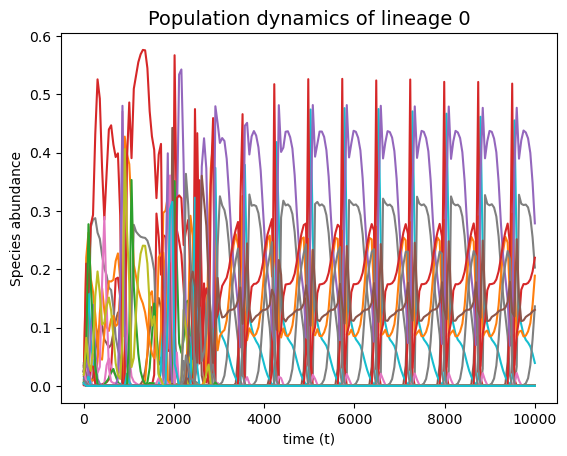

In [24]:
plt.plot(community_dynamics.ODE_sols['lineage 0'].t,community_dynamics.ODE_sols['lineage 0'].y.T)
plt.xlabel('time (t)')
plt.ylabel('Species abundance')
plt.title('Population dynamics of lineage 0',fontsize=14)

In [29]:
community_dynamics.invasibilities

{'lineage 0': 0.36363636363636365,
 'lineage 1': 0.36363636363636365,
 'lineage 2': 0.36363636363636365,
 'lineage 3': 0.36363636363636365,
 'lineage 4': 0.36363636363636365}

In [31]:
print('Number of unique species compositions = ', community_dynamics.no_unique_compositions, end = '\n')
print('Compositions = ', community_dynamics.unique_composition_label, end = '\n')

Number of unique species compositions =  1
Compositions =  {'lineage 0': 0, 'lineage 1': 0, 'lineage 2': 0, 'lineage 3': 0, 'lineage 4': 0}
